Defective: True
Flash


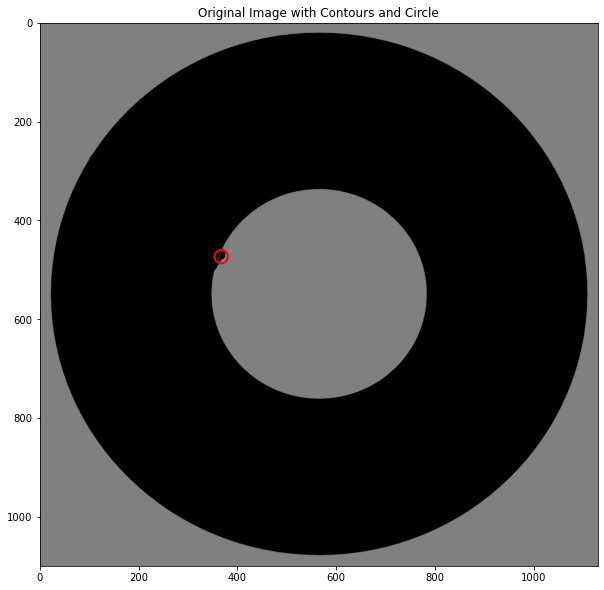

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("/kaggle/input/circle-detection/defective/defect1.png")

# Apply Gaussian blur to the image to remove noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Setting All parameters
t_lower = 100  # Lower Threshold
t_upper = 200  # Upper threshold
aperture_size = 5  # Aperture size
  
# Applying the Canny Edge filter
edge = cv2.Canny(blurred, t_lower, t_upper, apertureSize=aperture_size)
edge2 = edge.copy()

# Find contours in the image
contours, _ = cv2.findContours(edge2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

from matplotlib.patches import Circle

area_ratio_2 = []
Defective = False;

for i in [0, 3]:
    contour = contours[i]
    ellipse = cv2.fitEllipse(contour)
    (x, y), (MA, ma), angle = ellipse

    # Create a mask for the filled contour and filled ellipse
    contour_mask = np.zeros(img.shape, np.uint8)
    contour_mask2 = cv2.drawContours(contour_mask, [contour], 0, (255,255,255), -1)
    
    ellipse_mask = np.zeros(img.shape, np.uint8)
    ellipse_mask2 = cv2.ellipse(ellipse_mask, ellipse, (255,255,255), -1)

    # Bitwise AND the two masks to get the intersection
    intersection_mask = cv2.bitwise_xor(contour_mask2, ellipse_mask2)
      
    # Taking a matrix of size 5 as the kernel
    kernel = np.ones((5, 5), np.uint8)
    intersection = cv2.morphologyEx(intersection_mask, cv2.MORPH_OPEN, kernel)
    intersection_single_channel = cv2.cvtColor(intersection, cv2.COLOR_BGR2GRAY)
    
    area_mask = cv2.bitwise_xor(intersection, ellipse_mask2)
    area_mask_single_channel = cv2.cvtColor(area_mask, cv2.COLOR_BGR2GRAY)    
    ellipse_mask2_single_channel = cv2.cvtColor(ellipse_mask2, cv2.COLOR_BGR2GRAY)    
    num_white_pixels_area = cv2.countNonZero(area_mask_single_channel)
    num_white_pixels_ellipse = cv2.countNonZero(ellipse_mask2_single_channel)
    
    area_ratio = num_white_pixels_area/num_white_pixels_ellipse
    area_ratio_2.append(area_ratio)
    
    num_white_pixels = cv2.countNonZero(intersection_single_channel)
#     print("num_white_pixels:",num_white_pixels)
    
    if num_white_pixels > 0:   
        intersection_edge = cv2.Canny(intersection_single_channel, 100, 200, 5)
        intersection_edge2 = intersection_edge.copy()

        # Find contours in the image
        intersection_contours, _ = cv2.findContours(intersection_edge2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        intersection_contour = intersection_contours[0]
        (x, y), radius = cv2.minEnclosingCircle(intersection_contour)

        plt.figure(figsize=(10,10))
        plt.imshow(img, cmap='gray')
        plt.title('Original Image with Contours and Circle')
        plt.imshow(cv2.drawContours(255*np.ones_like(intersection_single_channel), intersection_contours, 0, 0, 1), cmap='gray_r', alpha=0.5)
        circ = Circle(xy=(x, y), radius=radius, color='red', fill=False, lw=2)
        plt.gca().add_artist(circ)

        Defective = True
        
print('Defective:', Defective)

def determine_defect(area_ratio_2):
    if area_ratio_2[0] < 1:
        return "Cut"
    elif area_ratio_2[0] > 1:
        return "Flash"
    elif area_ratio_2[1] < 1:
        return "Flash"
    elif area_ratio_2[1] > 1:
        return "Cut"
    else:
        return

print(determine_defect(area_ratio_2))